In [85]:
#setup
%load_ext pretty_jupyter

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import country_converter as coco
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import plotly.express as px

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# University of Sydney Precision Data Centre: Winter Data Analysis Challenge 2024
[//]: # (-.- .tabset)

## Data Provenance

### Life Expectancy (1770 - 2021)

In [66]:
#load inital dataset
raw = pd.read_csv("life-expectancy.csv")

#define entity categories
continent = ['Africa', 'Asia', 'Europe', 'Americas', 'Oceania']
income_groups = ['High-income countries', 'Upper-middle-income countries', 'Middle-income countries', 'Lower-middle-income countries', 'Low-income countries', 'No income group available']
development = ['More developed regions', 'Small Island Developing States (SIDS)', 'Less developed regions', 'Less developed regions, excluding China', 'Less developed regions, excluding least developed countries', 'Least developed countries', 'Land-locked Developing Countries (LLDC)']

#create new df for continents, income level, development status
continents = raw[raw['Entity'].isin(continent) == True]
income = raw[raw['Entity'].isin(income_groups) == True]
develop = raw[raw['Entity'].isin(development) == True]

#create new df for countries
countries = raw[raw['Entity'].isin(development) == False]
countries = countries[countries['Entity'].isin(income_groups) == False]
countries = countries[countries['Entity'].isin(continent) == False]

#add continent column for countries df
converter = coco.CountryConverter()
countries['Continent'] = converter.convert(names=countries['Code'], src="ISO3", to="continent")

#find countries without continent match - all European countries
a = countries[countries['Code'].isna() == True]
a = a[['Entity', 'Code']]
grouped = a.groupby(by="Entity").sum()

#update continent column
countries['Continent'] = countries['Continent'].str.replace('not found', 'Europe')

nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not fo

### Disease Mortality Rates (2010 - 2021)

In [29]:
# load dataset (https://ghdx.healthdata.org/record/ihme-data/gbd-2021-cause-specific-mortality-1990-2021)
disease = pd.read_excel("disease-mortality-rates.XLSX")

#create a subset with only mortality rate per 100,000 people
disease = disease[['location_type', 'location_name', 'cause_name', '2010 (ASMR)', '2019 (ASMR)', '2020 (ASMR)', '2021 (ASMR)']]

#convert columns to numeric
cols = ['2010 (ASMR)', '2019 (ASMR)', '2020 (ASMR)', '2021 (ASMR)']
for i in cols:
    disease[i] = disease.loc[:, i].str.replace(r"\(.*\)","", regex=True)
    disease[i] = pd.to_numeric(disease.loc[:, i])
    
#create column for change from 2010 to 2021
disease.loc[:, 'change'] = (disease.loc[:, '2021 (ASMR)'] - disease.loc[:, '2010 (ASMR)'])

#create global dataset
globe = disease[disease['location_type'] == 'Global']

#create global grouped dataset by cause
globe_group = globe[['cause_name', '2010 (ASMR)', '2019 (ASMR)', '2020 (ASMR)', '2021 (ASMR)', 'change']].groupby(by='cause_name').mean().reset_index()

#create africa dataset
a = ['North Africa and Middle East', 'Central Sub-Saharan Africa', 'Eastern Sub-Saharan Africa', 'Southern Sub-Saharan Africa', 'Western Sub-Saharan Africa']
africa = disease[(disease['location_type'] == 'Region') & (disease['location_name'].isin(a) == True)]

#create grouped africa dataset by cause
ac = africa.copy()
ac = ac[['cause_name', '2010 (ASMR)', '2019 (ASMR)', '2020 (ASMR)', '2021 (ASMR)', 'change']]
africa_group = ac.groupby(by='cause_name').mean().reset_index()

#create column of difference between african vs global average in 2021
africa_group['diff'] = (africa_group['2021 (ASMR)'] - globe_group['2021 (ASMR)'])
africa_group = africa_group.sort_values(by='diff', ascending=False)

### Life Expectancy Decomposition (1990 - 2021)

In [34]:
#load dataset (https://cloud.ihme.washington.edu/s/6w3TkFaQw63Djnd?)
decomp = pd.read_excel("life-expectancy-decomp.XLSX")

#create africa df
af = ['Western Sub-Saharan Africa', 'North Africa and Middle East', 'Central Sub-Saharan Africa', 'Southern Sub-Saharan Africa', 'Eastern Sub-Saharan Africa']
decomp_africa = decomp[decomp['Location Name'].isin(af) == True]

#filter 1990-2021 only
decomp_africa = decomp_africa[(decomp_africa['Start Year'] == 1990) & (decomp_africa['End Year'] == 2021)]
decomp_africa = decomp_africa.drop(axis=0, index=670)

### Death in Armed Conflicts (1989 - 2022)

In [39]:
#load df (Uppsala Conflict Data Program (2023); Natural Earth (2022) – processed by Our World in Data)
conflict = pd.read_csv("deaths-in-armed-conflicts.csv")

### Healthcare Expenditure (2000 - 2021)

In [42]:
expense = pd.read_csv("health-expenditure.csv")

### GDP

In [49]:
#load df
gdp = pd.read_csv("gdp.csv")
gdp = gdp.dropna()

#create country code column
converter = coco.CountryConverter()
gdp['iso_a3'] = converter.convert(names=gdp['Country '], to="ISO3")

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Caribbean small states not found in regex
Central Europe and the Baltics not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific ( not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Euro area not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
Heavily indebted poor countries (HIPC) not found in regex
High income not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA blend not found in regex
IDA only not found in regex
IDA total not found in regex
Late-demographic dividend not found in regex
Latin America & Caribbean not found in re

In [53]:
#check which ones were missed - only regions, all country codes found
#gdp[gdp['iso_a3'] == 'not found']

## Introduction

#### ***Introduction***

This report aims to deepen understanding of how Life Expectancy in Africa has increased over time, compared to global trends. To begin, we will look at the Life Expectancy over time for each continent.

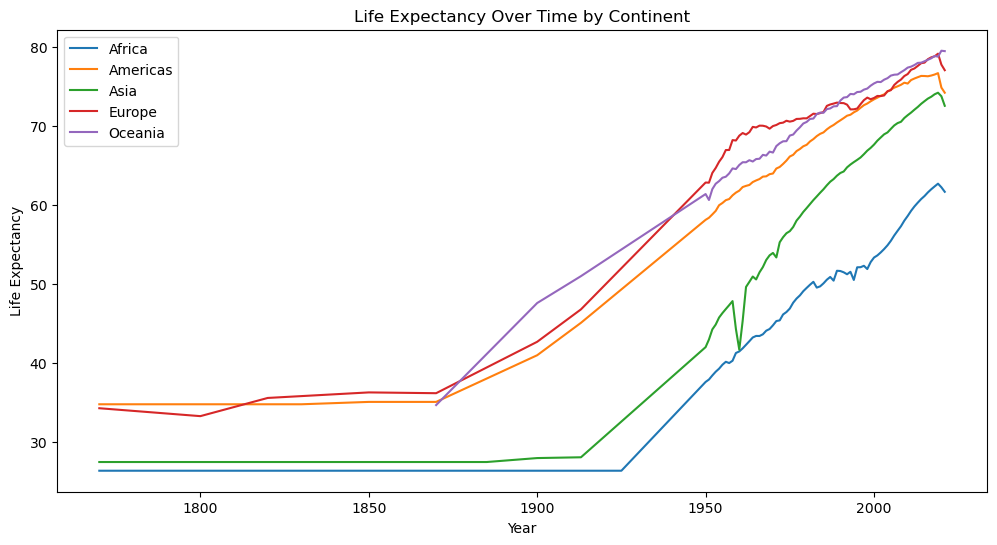

In [67]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=continents, x='Year', y='Period life expectancy at birth - Sex: all - Age: 0', hue='Entity')
plt.title('Life Expectancy Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

Life Expectancy globally seemingly flatlined from 1770 to 1870, then Europe, Oceania and the Americas begin to rapidly rise. It is important to note that data before 1950 is very sparse, so while it looks like the rise began in 1870, it could have started in the 30 years between 1870 and 1900. Regardless, the rise corresponds well with Louis Pasteur's development of Germ Theory in the 1860's, and his later developments of vaccines for Anthrax, Foul Cholera and Rabies (**TODO SOURCE**). It seems that these revolutionary discoveries laid groundwork for a continuous development of modern medicine, and thus improving life expectancy.

However, Asia and Africa don't begin to rise until around 1913 and 1925. In this report's exploration of ***Historical Context***, we will examine *why Africa's Life Expectancy lagged for that period of 55 years, and how it rose*. We will then examine *why there is currently such a gap between Africa and other continents* in the ***Contemporary Context*** and ***Disease Analysis*** sections.

## Historical Context

## Contemporary Context

## Disease Analysis

## Conclusion